In [108]:
#Importing Libraries 
#basics and Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



#ML libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 



#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import classification_report, confusion_matrix




#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [109]:
url = "http://nrvis.com/data/mldata/pima-indians-diabetes.csv"

# buat nama header
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', ' DiabetesPedigreeFunction', 'Age', 'ClassVariable']

# baca dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,ClassVariable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                  768 non-null int64
Glucose                      768 non-null int64
BloodPressure                768 non-null int64
SkinThickness                768 non-null int64
Insulin                      768 non-null int64
BMI                          768 non-null float64
 DiabetesPedigreeFunction    768 non-null float64
Age                          768 non-null int64
ClassVariable                768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [111]:
# Variabel independen
x = dataset.drop(["ClassVariable"], axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [112]:
# Variabel dependen
y =dataset.ClassVariable.astype('category')
y.head()

0    1
1    0
2    1
3    0
4    1
Name: ClassVariable, dtype: category
Categories (2, int64): [0, 1]

In [113]:
dataset.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
 DiabetesPedigreeFunction    0
Age                          0
ClassVariable                0
dtype: int64

In [114]:
dataset['BMI'].fillna(dataset['BMI'].median(), inplace=True)
dataset['Glucose'].fillna(dataset['Glucose'].median(), inplace=True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].median(), inplace=True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace=True)

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,ClassVariable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [116]:
#Feature Scaling
 
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [117]:
#KNN

classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [118]:
#Prediction n=5
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 0]


In [119]:
y_actual1=y_test.tolist()
y_pred1=y_pred.tolist()

In [120]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101  18]
 [ 31  42]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.80       119
           1       0.70      0.58      0.63        73

    accuracy                           0.74       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



In [121]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train, y_train)
 pred_i = knn.predict(x_test)
 error.append(np.mean(pred_i != y_test))

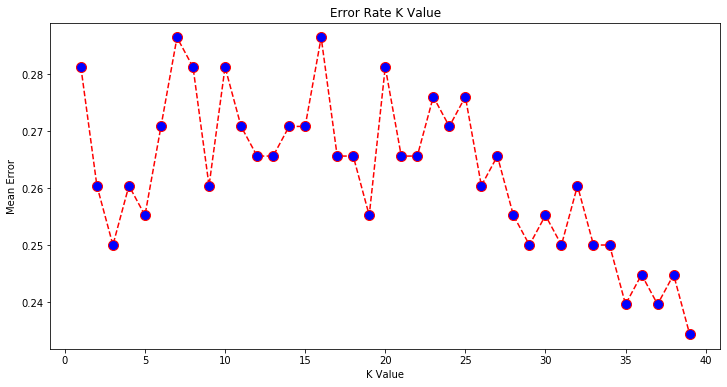

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', 
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Mean Error')
plt.show()

In [123]:
#Training and Prediction

classifier1 = KNeighborsClassifier(n_neighbors=39) 
classifier1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

In [124]:
#Prediction
y_pred2 = classifier1.predict(x_test)
print(y_pred2)

[1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 0]


In [125]:
y_actual2=y_test.tolist()
y_pred2=y_pred.tolist()

In [126]:
#Evaluate
print(confusion_matrix(y_actual2, y_pred2))

[[101  18]
 [ 31  42]]


In [127]:
clf = KNeighborsClassifier(n_neighbors=39)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  76.5625


In [128]:
#Classification and prediction
#SVM
model = SVC(kernel='linear')
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  81.25


In [129]:
model = SVC(C=2, kernel='rbf', gamma='scale')
model.fit(x_train, y_train)

pred = model.predict(x_test)
print (round(score(y_test, pred)*100,2))

76.56


In [130]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  74.47916666666666
